In [1]:
import pandas as pd
import numpy as np

import os
import json
import pymongo

In [2]:
client = pymongo.MongoClient(host="localhost", port=27017)
db = client.get_database(name='enwiki')
revs_coll = db.get_collection(name='revs')
ores_coll = db.get_collection(name='ores')

In [3]:
df = pd.read_csv(r'D:\Development\Thesis\Data\1000.csv')
page_ids = []
for entry in revs_coll.find():
    page_ids.append(entry['_id'])

####  Make sure the ids in DB are correct

In [4]:
len(df[df.Article_ID.isin(page_ids)])==1000

True

### Calculating the ORES score

In [5]:
def calc_ores_score(ores_rev):
    if ores_rev is None or 'probability' not in ores_rev:
        return 0

    proba = ores_rev['probability']

    b = proba['B']
    c = proba['C']
    fa = proba['FA']
    ga = proba['GA']
    start = proba['Start']
    # Stub = proba['Stub']

    score = start + 2 * c + 3 * b + 4 * ga + 5 * fa
    return score

def get_ores_score(rev_id):
    ores_rev = ores_coll.find_one(filter={'_id': rev_id})
    score = calc_ores_score(ores_rev)
    return score

def get_page_title(page_id):
    return df[df.Article_ID == page_id]['Page_Title'].iloc[0]

### Single Page Processing

In [8]:
ores_rows = []
ores_cols = ['page_id', 'page_title', 'user_name', 'total_edits', 'ores_mean', 'ores_median']

user_ores_scores = {}
prev_rev_id = None
page_id = 2070
page = revs_coll.find_one(filter={'_id': page_id})

for rev in page['revs']:
    rev_id = rev['rev_id']
    user_name = rev['user_name']
    size = rev['size']
    user_id = rev['user_id']
    timestamp = rev['timestamp']
    
    score = get_ores_score(rev_id)
    if prev_rev_id:
        prev_score = get_ores_score(prev_rev_id)
        score = score - prev_score
        
    if user_name not in user_ores_scores:
        user_ores_scores[user_name] = []
    user_ores_scores[user_name].append(score)    
    
    prev_rev_id = rev_id

for user in user_ores_scores.keys():
    total = len(user_ores_scores[user])
    mean = np.mean(user_ores_scores[user])
    median = np.median(user_ores_scores[user])
    ores_rows.append([page_id, get_page_title(page_id), user, total, mean, median])

### All Pages Processing

In [9]:
ores_rows = []
ores_cols = ['page_id', 'page_title', 'user_name', 'total_edits', 'ores_mean', 'ores_median']

for page_id in page_ids:
    print('Page ID: {}\t{}'.format(page_id, get_page_title(page_id)))
    
    user_ores_scores = {}
    prev_rev_id = None
    page = revs_coll.find_one(filter={'_id': page_id})

    for rev in page['revs']:
        rev_id = rev['rev_id']
        user_name = rev['user_name']
        size = rev['size']
        user_id = rev['user_id']
        timestamp = rev['timestamp']

        score = get_ores_score(rev_id)
#         if prev_rev_id:
#             prev_score = get_ores_score(prev_rev_id)
#             score = score - prev_score

        if user_name not in user_ores_scores:
            user_ores_scores[user_name] = []
        user_ores_scores[user_name].append(score)    

        prev_rev_id = rev_id

    for user in user_ores_scores.keys():
        total = len(user_ores_scores[user])
        mean = np.mean(user_ores_scores[user])
        median = np.median(user_ores_scores[user])
        ores_rows.append([page_id, get_page_title(page_id), user, total, mean, median])

Page ID: 2070	Act of Settlement 1701
Page ID: 771	American Revolutionary War
Page ID: 1134	Analysis
Page ID: 775	Algorithm
Page ID: 1536	Acropolis
Page ID: 740	Allah
Page ID: 1540	Aeneas
Page ID: 290	A
Page ID: 25	Autism
Page ID: 649	Arraignment
Page ID: 639	Alkane
Page ID: 752	Art
Page ID: 1422	Amide
Page ID: 736	Albert Einstein
Page ID: 620	Animal Farm
Page ID: 569	Anthropology
Page ID: 19283913	Poverty in the United States
Page ID: 1386	Arachnophobia
Page ID: 856	Apple Inc.
Page ID: 1152	Alan Garner
Page ID: 1203	Alternate history
Page ID: 1210	Astronomical unit
Page ID: 4576465	Flower
Page ID: 20453	Meconium
Page ID: 751	Aikido
Page ID: 929	Alpha
Page ID: 1640	Alfred the Great
Page ID: 928	Axiom
Page ID: 674	Anatomy
Page ID: 580	Astronomer
Page ID: 23371726	Lagrangian mechanics
Page ID: 308	Aristotle
Page ID: 765	Abortion
Page ID: 670	Alphabet
Page ID: 332	Animalia (book)
Page ID: 2088	Aphasia
Page ID: 897	Arsenic
Page ID: 2007	Archery
Page ID: 2125	Algebraic extension
Page ID: 177

Page ID: 2926	Antarctic
Page ID: 2956	Ain't I a Woman?
Page ID: 2992	Amputation
Page ID: 3004	Associate Justice of the Supreme Court of the United States
Page ID: 3189	Ascending chain condition
Page ID: 3204	Achiltibuie
Page ID: 3879	Business statistics
Page ID: 3403	Bead weaving
Page ID: 4024	Butterfly effect
Page ID: 4064	Borsuk–Ulam theorem
Page ID: 4516	Body substance isolation
Page ID: 5794	Central tendency
Page ID: 5736	Catherine Coleman
Page ID: 6563	Conjunction introduction
Page ID: 6749	Cheerleading
Page ID: 11687	Fuel-air explosive
Page ID: 18204	Lacan
Page ID: 29333	Social evolution
Page ID: 2604	Abated
Page ID: 26569537	Recent African origin of modern humans
Page ID: 2720	Abeyance
Page ID: 70534	W. Edwards Deming
Page ID: 70873	Nathuram Godse
Page ID: 140558	Fiber
Page ID: 140752	Rudolf Virchow
Page ID: 140807	Yucca Mountain nuclear waste repository
Page ID: 140839	Sviatoslav Richter
Page ID: 140905	J. Jonah Jameson
Page ID: 140467	Shuriken
Page ID: 903	Arable land
Page ID:

Page ID: 4506051	George Crockett Strong
Page ID: 4506081	Pericardial sinus
Page ID: 4506213	Psyllium seed husks
Page ID: 4506216	ATN Gujarati
Page ID: 4506239	AN/FPS-35
Page ID: 4506267	List of weather records
Page ID: 4506437	Icelandic nationality law
Page ID: 4506505	Sunwing Airlines
Page ID: 4506580	Stadionul Ion Moina (1911)
Page ID: 4506766	Shapira
Page ID: 4506997	Sinus venosus
Page ID: 4507232	Adductor canal
Page ID: 4507275	1633 (novel)
Page ID: 4507310	Mandibular canal
Page ID: 4507367	Francis Libermann
Page ID: 4507473	Darío Moreno
Page ID: 4507604	Phthisis bulbi
Page ID: 4507652	Barker code
Page ID: 4507850	Krishak Bharati Cooperative
Page ID: 4507862	Lyra Reef
Page ID: 4507911	Feeneyism
Page ID: 4507925	Michael Dunahee
Page ID: 4508007	Patrick O. Brown
Page ID: 4508118	Baron I. Karl-Gustav E. Lagerfelt
Page ID: 4508492	Tokimeki Memorial 2
Page ID: 4508495	Paul Flaherty
Page ID: 4508797	King's graph
Page ID: 4508811	Knight's graph
Page ID: 4509028	Gadolosaurus
Page ID: 45094

Page ID: 17956036	National Meteorological Center of CMA
Page ID: 17958196	Liberalism in Zimbabwe
Page ID: 17958429	Standardized rate
Page ID: 17959675	Carl Braden
Page ID: 17960231	Algebraic signal processing
Page ID: 17960251	Gamō clan
Page ID: 17963238	Countermarked coin
Page ID: 17966663	Lathyrus splendens
Page ID: 17968310	Ltns
Page ID: 17968723	Posterior shoulder
Page ID: 17971017	Circadian advantage
Page ID: 17971141	Heterastridium
Page ID: 17974524	Extinguishment
Page ID: 17977433	AME Accounting Software
Page ID: 17981572	Echinocandin B
Page ID: 17984433	Terai Army
Page ID: 17986461	Interpretation (canon law)
Page ID: 17987462	Ministerial regulation
Page ID: 17987479	Dhandhuka (Lok Sabha constituency)
Page ID: 17995149	Aperiodic finite state automaton
Page ID: 17996305	Pyeonyuk
Page ID: 17998869	Visual privacy
Page ID: 18000940	Dzivarasekwa (parliamentary constituency)
Page ID: 18001499	Bayesian efficiency
Page ID: 18002267	JNA Wireless Association
Page ID: 18003076	Administrato

Page ID: 27928770	Gog Magog Games
Page ID: 28713459	2010 Honda Indy Edmonton
Page ID: 28770788	Responsible Parenthood and Reproductive Health Act of 2012
Page ID: 30372477	Jiaozhou Bay Bridge
Page ID: 31019539	Urbanlining
Page ID: 31342681	J. T. Nickel Family Nature and Wildlife Preserve
Page ID: 31343559	Article One Partners
Page ID: 31344028	Star Brigade
Page ID: 31344481	Arthur H. White
Page ID: 31344578	Train inspection system
Page ID: 31345089	BS 8888
Page ID: 31346116	Geographical cluster
Page ID: 31346808	Garand carbine
Page ID: 31347126	McClelland Sherd
Page ID: 31347952	XVII International AIDS Conference, 2008
Page ID: 31348515	Firdeusi Institute
Page ID: 31348832	Ditsworthy Warren House
Page ID: 31689449	nan
Page ID: 32315242	Middle Eastern Mental Health Issues & Syndromes
Page ID: 32334481	The Kokoda Challenge
Page ID: 33323158	2011–12 Biathlon World Cup
Page ID: 33634290	England Athletics Hall of Fame
Page ID: 33800195	Classic Six
Page ID: 33802230	Classic Seven
Page ID: 33

In [12]:
revs = []
for page_id in page_ids:
    page = revs_coll.find_one(filter={'_id': page_id})
    for rev in page['revs']:
        revs.append(rev['rev_id'])

In [13]:
print(len(revs))
# revs_ser = pd.Series(revs)
revs_df = pd.DataFrame(data=revs, columns=['rev_id'])
revs_df.head()

1005680


,rev_id
0,9406
1,9407
2,9408
3,9409
4,9410


### Saving results

In [10]:
ores_df = pd.DataFrame(data=ores_rows, columns=ores_cols)
ores_df.sort_values(by='ores_mean', ascending=False)

,page_id,page_title,user_name,total_edits,ores_mean,ores_median
227183,70600,Princes in the Tower,121.210.36.122,1,4.849722,4.849722
204641,69718,"Herbert Kitchener, 1st Earl Kitchener",Allanaaaaaaa,3,4.848736,4.851120
406676,2183356,Imperial Trans-Antarctic Expedition,Ealdgyth,13,4.848572,4.848952
406678,2183356,Imperial Trans-Antarctic Expedition,Tony1,1,4.847894,4.847894
406679,2183356,Imperial Trans-Antarctic Expedition,65.49.2.96,1,4.847229,4.847229
204637,69718,"Herbert Kitchener, 1st Earl Kitchener",Opencooper,1,4.845710,4.845710
406681,2183356,Imperial Trans-Antarctic Expedition,72.141.32.215,1,4.845357,4.845357
204640,69718,"Herbert Kitchener, 1st Earl Kitchener",RA0808,1,4.845017,4.845017
204638,69718,"Herbert Kitchener, 1st Earl Kitchener",TsaristAlvin,1,4.845017,4.845017
406677,2183356,Imperial Trans-Antarctic Expedition,Skizzik,2,4.844363,4.844363


In [11]:
ores_df.to_csv(r'D:\Development\Thesis\Data\ores.csv', index=False)

In [14]:
revs_df.to_csv(r'D:\Development\Thesis\Data\revs.csv', index=False, header=False)

### SMEs vs. Unknowns ORES quality

In [15]:
train_df = pd.read_csv(r'D:\Development\Thesis\Data\train_data.csv')

In [16]:
train_df.head()

,page_id,page,category,user,page_edits,page_edits_ratio,page_talk_edits,edit_period_q1,edit_period_q2,edit_period_q3,...,title_similarity,summary_similarity,avg_persistence,content_token_count,content_token_edit_count_avg,content_token_vs_stop_words,content_token_vs_token,contribution_similarity,persistence_exists,label
0,140968,Rotavirus,Education,Ben Moore,2.0,0.001047,0.0,0.0,0.0,0.0,...,0.001015,0.006797,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,1.0,1
1,140968,Rotavirus,Education,Magnus Manske,1.0,0.000523,0.0,1.0,0.0,0.0,...,0.000000,0.002959,5.792022e+07,1.0,1.0,0.0,0.0,0.060004,1.0,0
2,140968,Rotavirus,Education,Wilke,3.0,0.001570,0.0,1.0,0.0,0.0,...,0.002049,0.028137,4.990809e+07,0.0,0.0,0.0,0.0,0.000000,1.0,1
3,140968,Rotavirus,Education,PeterJohnson,1.0,0.000523,0.0,1.0,0.0,0.0,...,0.000000,0.000381,2.772753e+07,0.0,0.0,0.0,0.0,0.000000,1.0,0
4,140968,Rotavirus,Education,Mikael Haggstrom,1.0,0.000523,0.0,0.0,1.0,0.0,...,0.000000,0.007086,2.099639e+06,0.0,0.0,0.0,0.0,0.000000,1.0,1


In [17]:
ores_df.rename(columns={"user_name": "user"}, inplace=True)
ndf = ores_df.merge(train_df, how='inner', on=['page_id', 'user'])

In [18]:
ndf.head()

,page_id,page_title,user,total_edits,ores_mean,ores_median,page,category,page_edits,page_edits_ratio,...,title_similarity,summary_similarity,avg_persistence,content_token_count,content_token_edit_count_avg,content_token_vs_stop_words,content_token_vs_token,contribution_similarity,persistence_exists,label
0,2070,Act of Settlement 1701,John K,1,2.791347,2.791347,Act of Settlement 1701,Law,1.0,0.001031,...,0.000381,0.019606,2.428439e+07,46.0,46.0,3.0,0.0,0.0,1.0,1
1,2070,Act of Settlement 1701,John Carter,1,2.692534,2.692534,Act of Settlement 1701,Law,1.0,0.001031,...,0.000000,0.000110,5.080971e+07,15.0,15.0,0.0,1.0,0.0,1.0,0
2,2070,Act of Settlement 1701,Alandavidson,1,2.833685,2.833685,Act of Settlement 1701,Law,1.0,0.001031,...,0.005324,0.017462,1.722749e+07,3.0,3.0,0.0,3.0,0.0,1.0,1
3,2070,Act of Settlement 1701,StAnselm,1,2.939715,2.939715,Act of Settlement 1701,Law,1.0,0.001031,...,0.000000,0.000834,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0
4,771,American Revolutionary War,John K,4,3.755110,4.044018,American Revolutionary War,History,4.0,0.000351,...,0.000134,0.002819,1.037648e+06,78.0,19.5,5.0,0.0,0.0,1.0,1


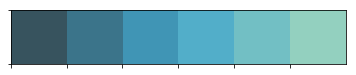

In [19]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')
sns.palplot(sns.color_palette("GnBu_d"))

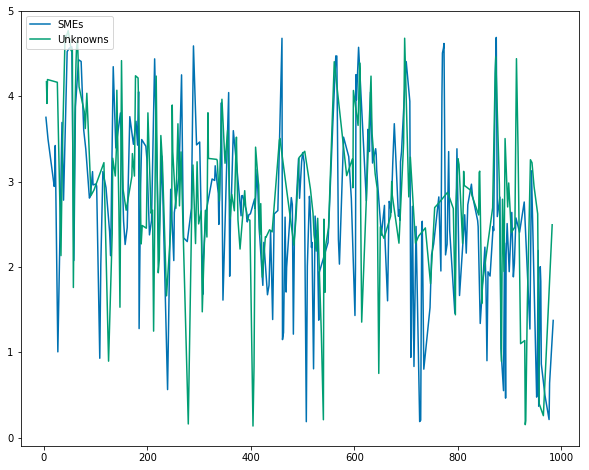

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

# ax.set_xlabel('Threshold')
# ax.set_ylabel('Performance')

l1 = ax.plot(ndf[(ndf.label==1) & (ndf.page_edits > 1)]['ores_mean'], label='SMEs')
l2 = ax.plot(ndf[(ndf.label==0) & (ndf.page_edits > 1)]['ores_mean'], label='Unknowns')

legend = ax.legend(loc='upper left')

In [21]:
print(np.mean(ndf[(ndf.label==1) & (ndf.page_edits > 0)]['ores_mean']))
print(np.mean(ndf[(ndf.label==0) & (ndf.page_edits > 0)]['ores_mean']))

2.592423696403845
2.6822120856265705


In [22]:
ndf[(ndf.label==1) & (ndf.page_edits > 2) & (ndf.ores_mean > 0.1)][['ores_mean', 'total_edits', 'user', 'page_title']]

,ores_mean,total_edits,user,page_title
4,3.755110,4,John K,American Revolutionary War
8,3.499654,354,Rjensen,American Revolutionary War
20,2.944662,6,Corti,Algorithm
21,3.026054,3,Oleg Alexandrov,Algorithm
22,3.424448,6,David Eppstein,Algorithm
35,3.694992,7,DoctorW,Autism
38,2.783732,4,Centerforautism,Autism
45,4.526417,154,Doc James,Autism
49,4.565264,4,Guldolen,Autism
54,4.582444,3,Ongmianli,Autism


In [23]:
ndf[(ndf.label==0) & (ndf.page_edits > 2) & (ndf.ores_mean > 0.1)][['ores_mean', 'total_edits', 'user', 'page_title']]

,ores_mean,total_edits,user,page_title
5,4.172705,3,R.D.H. (Ghost In The Machine),American Revolutionary War
6,3.917734,30,Antandrus,American Revolutionary War
26,4.165732,18,Dsimic,Algorithm
36,3.433268,23,Midgley,Autism
42,4.673533,5,2over0,Autism
53,4.534781,5,Martinevans123,Autism
60,3.788813,76,Antandrus,Albert Einstein
62,4.376980,8,Corti,Albert Einstein
63,4.554786,3,Kappa,Albert Einstein
68,4.112881,3,Pallen,Albert Einstein
